In [0]:
from __future__ import print_function, division  # Python 2 compatibility if needed

In [0]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
import math
from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

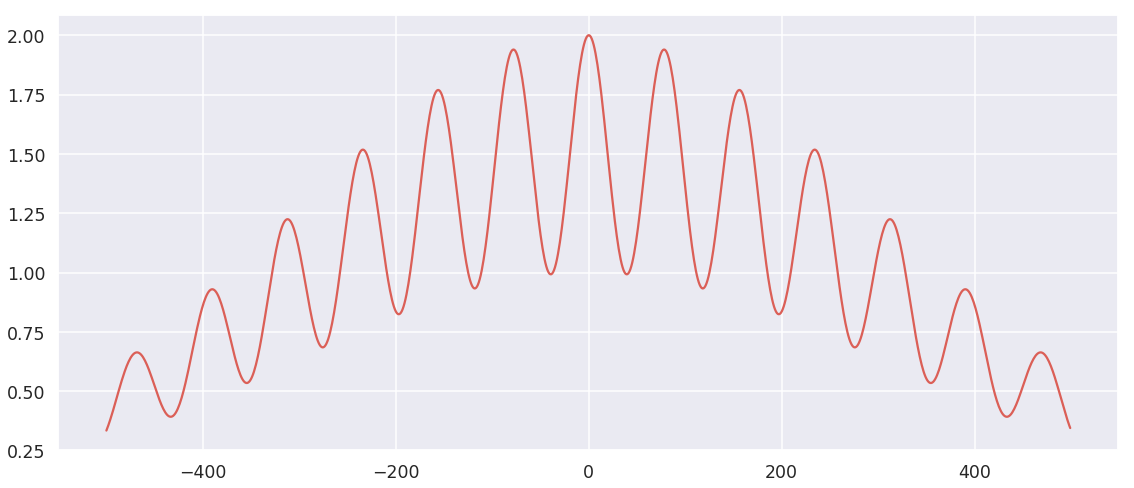

In [14]:
#Exercie 1 : The goal of simulated annealing is to maximize the performance of a model relative to a fitness function defined over the model parameters you are seeking to optimize.
# f(x) = m*n where m = 1+ cos(0.04v)2; n = exp(−v2 /(20000))
x1 = np.arange(-500,500,1)

arr_func = np.empty(len(x1))
for i in range(len(x1)):
  arr_func[i] = f(x1[i])

plt.plot(x1, arr_func)
plt.show()

In [0]:
#Exercise 2
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature = 10,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [0]:
interval = (250, 500)

#fitness function
def f(x):
    """ Function to minimize."""
    return (1 + math.cos(0.04 * x) ** 2) * (math.exp(-1 * (x ** 2) / 200000))

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [0]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [0]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [0]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [0]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [0]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [22]:
#Lets Try!
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =    1, state =  269, cost = 0.73, new_state =  269, new_cost = 0.73 ...
Step # 1/30 : T = 0.967, state =  269, cost = 0.73, new_state =  269, new_cost = 0.734 ...
Step # 2/30 : T = 0.933, state =  269, cost = 0.734, new_state =  269, new_cost = 0.732 ...
Step # 3/30 : T =  0.9, state =  269, cost = 0.732, new_state =  269, new_cost = 0.732 ...
Step # 4/30 : T = 0.867, state =  269, cost = 0.732, new_state =  269, new_cost = 0.734 ...
Step # 5/30 : T = 0.833, state =  269, cost = 0.734, new_state =  270, new_cost = 0.726 ...
Step # 6/30 : T =  0.8, state =  270, cost = 0.726, new_state =  267, new_cost = 0.765 ...
Step # 7/30 : T = 0.767, state =  267, cost = 0.765, new_state =  270, new_cost = 0.723 ...
Step # 8/30 : T = 0.733, state =  270, cost = 0.723, new_state =  272, new_cost = 0.701 ...
Step # 9/30 : T =  0.7, state =  272, cost = 0.701, new_state =  272, new_cost = 0.697 ...
Step #10/30 : T = 0.667, state =  272, cost = 0.697, new_state =  268, new_cost = 0.742

In [23]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

state
c

0.33421671835428

In [0]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

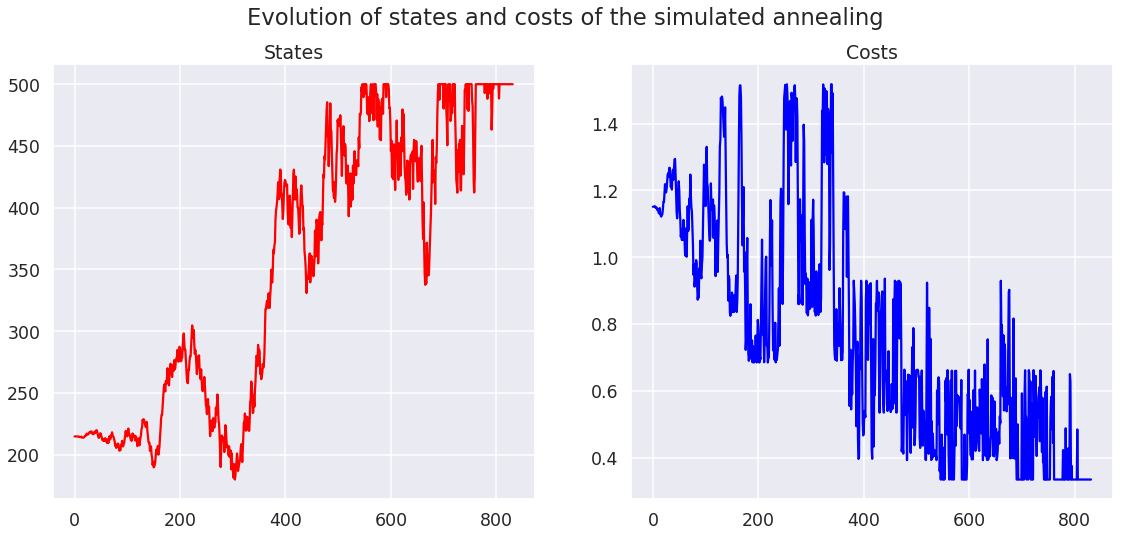

In [0]:
see_annealing(states, costs)